In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.applications.resnet_v2 import ResNet50V2


In [14]:
batch_size = 32
img_size = 224
data_dir = './data'
NUM_CLASSES = 3

In [15]:
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_generator = datagen.flow_from_directory(
        'data',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        subset='training',
        class_mode='categorical')
validation_generator = datagen.flow_from_directory(
        'data',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        subset='validation',
        class_mode='categorical')

Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


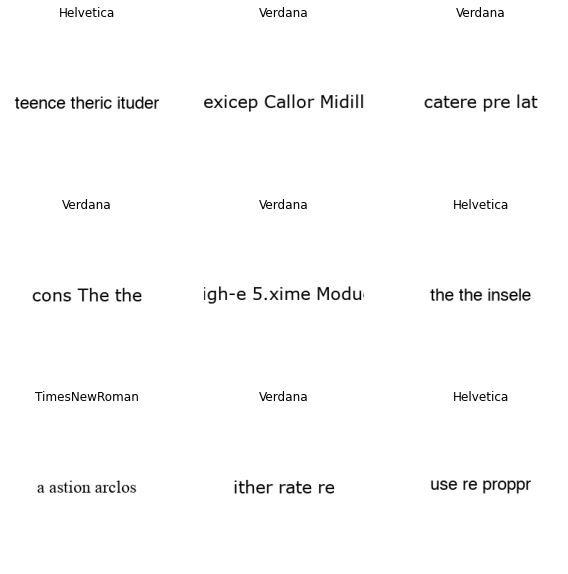

In [16]:
import matplotlib.pyplot as plt
# class name
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(10, 10))
images, labels = train_generator.next()
for i in range(9):    
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [24]:
IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
LOSS_FUNCTION = 'categorical_crossentropy'

In [25]:
# load model
model = tf.keras.models.Sequential()
model.add(ResNet50V2(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = "imagenet"))
model.add(tf.keras.layers.Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))
model.layers[0].trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 2048)              23564800  
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6147      
Total params: 23,570,947
Trainable params: 6,147
Non-trainable params: 23,564,800
_________________________________________________________________


In [26]:
sgd = tf.keras.optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = sgd,loss=LOSS_FUNCTION, metrics = 'accuracy')

In [27]:
STEPS_PER_EPOCH_TRAINING = 32
STEPS_PER_EPOCH_VALIDATION = 32

In [28]:
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=3
)

Epoch 1/3


2021-12-01 13:26:45.530163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - ETA: 0s - loss: 0.9748 - accuracy: 0.5225

2021-12-01 13:26:57.004245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 15s 367ms/step - loss: 0.9748 - accuracy: 0.5225 - val_loss: 0.8936 - val_accuracy: 0.6200
Epoch 2/3
38/38 [==============================] - 13s 354ms/step - loss: 0.8615 - accuracy: 0.6175 - val_loss: 0.8409 - val_accuracy: 0.6700
Epoch 3/3
38/38 [==============================] - 13s 351ms/step - loss: 0.8268 - accuracy: 0.6367 - val_loss: 0.9577 - val_accuracy: 0.5600


In [30]:
score = model.evaluate(validation_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.9577047228813171
Test accuracy: 0.5600000023841858
